In [3]:
import numpy as np
import pandas as pd
import seaborn as sb

from keras.models import Sequential  # class
from keras.models import load_model  # model 사용
from keras.layers import Dense       # 전결합
from keras.callbacks import EarlyStopping # 학습 자동 중지

from keras import regularizers 

import matplotlib.pyplot as plt
%matplotlib inline  

In [73]:
data = np.loadtxt('./pima.csv', delimiter=",")
print(type(data))
print('total:', data.shape)
x=data[0:568, 0:8]         # 총 768건중 568 건의 학습 데이터, 568행 8열의 구성
y=data[0:568, 8:]  
print(x.shape)
print(y.shape)

x_val=data[568:668, 0:8]  # 100 건의 검증 데이터, 100행 8열의 구성
y_val=data[568:668, 8:]  
print(x_val.shape)
print(y_val.shape)

x_test=data[668:, 0:8]     # 100 건의 테스트 데이터, 100행 8열의 구성
y_test=data[668:, 8:]  
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
total: (768, 9)
(568, 8)
(568, 1)
(100, 8)
(100, 1)
(100, 8)
(100, 1)


In [84]:
# 두개의 은닉층을 사용하는 경우
model = Sequential()

# 입력값: 8 개, 출력 노드 갯수: 128개, 활성화 함수: relu

# 첫번째 은닉층(입력층은 선언 안함)
model.add(Dense(128, input_shape=(8, ), activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))  
model.add(Dense(64, activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))  # 이항 분류

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# 가장 작은 오차가 10번 발생하면 학습 자동 중지
early_stopping = EarlyStopping(monitor='loss', patience=10)

hist = model.fit(x, y, validation_data=(x_val, y_val), 
                 epochs=1000, batch_size=10, 
                 callbacks=[early_stopping])

Train on 568 samples, validate on 100 samples
Epoch 1/1000
568/568 [==============================] - 1s 2ms/step - loss: 2.9100 - acc: 0.6092 - val_loss: 2.2735 - val_acc: 0.6500
Epoch 2/1000
568/568 [==============================] - 0s 285us/step - loss: 2.1338 - acc: 0.6532 - val_loss: 1.9189 - val_acc: 0.6400
Epoch 3/1000
568/568 [==============================] - 0s 264us/step - loss: 1.8304 - acc: 0.6673 - val_loss: 1.9096 - val_acc: 0.5200
Epoch 4/1000
568/568 [==============================] - 0s 297us/step - loss: 1.7269 - acc: 0.6831 - val_loss: 1.7231 - val_acc: 0.6200
Epoch 5/1000
568/568 [==============================] - 0s 298us/step - loss: 1.6097 - acc: 0.6778 - val_loss: 1.6651 - val_acc: 0.5900
Epoch 6/1000
568/568 [==============================] - 0s 275us/step - loss: 1.5887 - acc: 0.6637 - val_loss: 1.6569 - val_acc: 0.5200
Epoch 7/1000
568/568 [==============================] - 0s 299us/step - loss: 1.5464 - acc: 0.6356 - val_loss: 1.6219 - val_acc: 0.6200
Epoc

568/568 [==============================] - 0s 333us/step - loss: 0.6092 - acc: 0.7324 - val_loss: 0.6194 - val_acc: 0.7200
Epoch 61/1000
568/568 [==============================] - 0s 338us/step - loss: 0.6010 - acc: 0.7254 - val_loss: 0.6404 - val_acc: 0.7400
Epoch 62/1000
568/568 [==============================] - 0s 315us/step - loss: 0.6050 - acc: 0.7412 - val_loss: 0.6243 - val_acc: 0.7200
Epoch 63/1000
568/568 [==============================] - 0s 256us/step - loss: 0.5936 - acc: 0.7394 - val_loss: 0.6483 - val_acc: 0.7100
Epoch 64/1000
568/568 [==============================] - 0s 299us/step - loss: 0.5960 - acc: 0.7500 - val_loss: 0.6234 - val_acc: 0.7500
Epoch 65/1000
568/568 [==============================] - 0s 356us/step - loss: 0.5946 - acc: 0.7553 - val_loss: 0.6178 - val_acc: 0.7400
Epoch 66/1000
568/568 [==============================] - 0s 337us/step - loss: 0.5856 - acc: 0.7377 - val_loss: 0.6250 - val_acc: 0.7400
Epoch 67/1000
568/568 [==============================] 

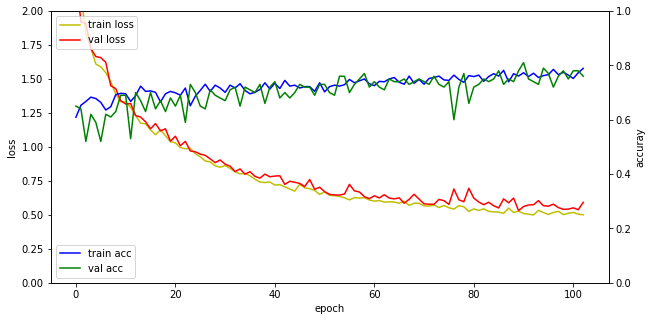

In [85]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 오차
loss_ax.set_ylim([0.0, 2.0]) # 값을 반영하여 변경, 왼쪽 y 축

acc_ax.plot(hist.history['acc'], 'b', label='train acc')   # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])    # 오른쪽 y 축

loss_ax.set_xlabel('epoch')    # x축 레이블
loss_ax.set_ylabel('loss')     # 오차 레이블, 왼쪽 y 축
acc_ax.set_ylabel('accuray')   # 정확도 레이블, 오른쪽 y 축

loss_ax.legend(loc='upper left') # 오차 레이블 출력 위치
acc_ax.legend(loc='lower left')  # 정확도 레입르 출력 위치

plt.show()

In [86]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

100/100 [==============================] - 0s 1ms/step
손실값: 0.5645842741429806 /정확도: 73.0 %


In [87]:
model.save('./Pima.h5')

In [88]:
model = load_model('./Pima.h5')

In [89]:
print(x_test[0:10])

[[6.00e+00 9.80e+01 5.80e+01 3.30e+01 1.90e+02 3.40e+01 4.30e-01 4.30e+01]
 [9.00e+00 1.54e+02 7.80e+01 3.00e+01 1.00e+02 3.09e+01 1.64e-01 4.50e+01]
 [6.00e+00 1.65e+02 6.80e+01 2.60e+01 1.68e+02 3.36e+01 6.31e-01 4.90e+01]
 [1.00e+00 9.90e+01 5.80e+01 1.00e+01 0.00e+00 2.54e+01 5.51e-01 2.10e+01]
 [1.00e+01 6.80e+01 1.06e+02 2.30e+01 4.90e+01 3.55e+01 2.85e-01 4.70e+01]
 [3.00e+00 1.23e+02 1.00e+02 3.50e+01 2.40e+02 5.73e+01 8.80e-01 2.20e+01]
 [8.00e+00 9.10e+01 8.20e+01 0.00e+00 0.00e+00 3.56e+01 5.87e-01 6.80e+01]
 [6.00e+00 1.95e+02 7.00e+01 0.00e+00 0.00e+00 3.09e+01 3.28e-01 3.10e+01]
 [9.00e+00 1.56e+02 8.60e+01 0.00e+00 0.00e+00 2.48e+01 2.30e-01 5.30e+01]
 [0.00e+00 9.30e+01 6.00e+01 0.00e+00 0.00e+00 3.53e+01 2.63e-01 2.50e+01]]


In [90]:
y_predict = model.predict(x_test[0:10])
print(type(y_predict))
print(y_predict.shape)
print(y_predict)
print(len(x_test[0:10])) # 10
print(y_test[0:10])

<class 'numpy.ndarray'>
(10, 1)
[[0.5107919 ]
 [0.41286087]
 [0.70611465]
 [0.24150649]
 [0.03295121]
 [0.44346082]
 [0.20545568]
 [0.9525656 ]
 [0.45306855]
 [0.29494193]]
10
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [91]:
for i in range(len(x_test[0:10])):
    # print(x_test[i])
    print('실제값: {0}, 예측값: {1}'.format(y_test[i], y_predict[i]), end='')
    
    if y_predict[i] >= 0.5:# 0 ~ 1
        print(' --> 당뇨')
    else:
        print(' --> 해당안됨')

실제값: [0.], 예측값: [0.5107919] --> 당뇨
실제값: [0.], 예측값: [0.41286087] --> 해당안됨
실제값: [0.], 예측값: [0.70611465] --> 당뇨
실제값: [0.], 예측값: [0.24150649] --> 해당안됨
실제값: [0.], 예측값: [0.03295121] --> 해당안됨
실제값: [0.], 예측값: [0.44346082] --> 해당안됨
실제값: [0.], 예측값: [0.20545568] --> 해당안됨
실제값: [1.], 예측값: [0.9525656] --> 당뇨
실제값: [1.], 예측값: [0.45306855] --> 해당안됨
실제값: [0.], 예측값: [0.29494193] --> 해당안됨


In [68]:
print(x_test[9])

[ 0.    93.    60.     0.     0.    35.3    0.263 25.   ]


In [116]:
data="0.,93.,60.,0.,0.,35.3,0.263,25."
print(data)

data = np.array(data.split(','), dtype=float)  # or int
print(type(data))
print(data.shape)
print(data)

0.,93.,60.,0.,0.,35.3,0.263,25.
<class 'numpy.ndarray'>
(8,)
[ 0.    93.    60.     0.     0.    35.3    0.263 25.   ]


In [117]:
x = np.array([data,])
print(type(x))
print(x.shape)
print(x)
print(len(x))

<class 'numpy.ndarray'>
(1, 8)
[[ 0.    93.    60.     0.     0.    35.3    0.263 25.   ]]
1


In [118]:
# 10번째 데이터를 대상으로 출력
yp = model.predict(x)
for i in range(len(x)):
    print('실제값: {0}, 예측값: {1}'.format(y_test[9], yp[i]), end='')
    
    if yp[i] >= 0.5:
        print(' --> 당뇨')
    else:
        print(' --> 해당안됨')

실제값: [0.], 예측값: [0.29494193] --> 해당안됨
